### Student Information
Name: Toni Dominique P. Garcia (珈希亞)

Student ID: 108065435

GitHub ID: tonistark23

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

### Data Preparation

In [2]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

# suppress future warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore", category=FutureWarning)

In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

<div style='background: #7fffd4'> <h1> >>> Exercise 2 (take home): </h1>
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. </div>

In [4]:
# simple query: select every 20th record in column text
X['text'][::20]

0       From: sd345@city.ac.uk (Michael Collier) Subje...
20      From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...
40      From: david-s@hsr.no (David A. Sjoen) Subject:...
60      From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...
80      From: annick@cortex.physiol.su.oz.au (Annick A...
                              ...                        
2160    From: joshuaf@yang.earlham.edu Subject: TIFF -...
2180    From: "Robert Knowles" <p00261@psilink.com> Su...
2200    From: thomas@ramsey.cs.laurentian.ca (F. Thoma...
2220    From: idr@rigel.cs.pdx.edu (Ian D Romanick) Su...
2240    From: balick@nynexst.com (Daphne Balick) Subje...
Name: text, Length: 113, dtype: object

In [5]:
# selection by callable: using callable indexes to select all categories that are > 1 (or not comp.graphics)
X.loc[lambda df: df.category>1]

,text,category,category_name
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [6]:
# use at to get column text, row 2250
X.at[2250, 'text']

'From: ingles@engin.umich.edu (Ray Ingles) Subject: Re: Concerning God\'s Morality (long) Organization: University of Michigan Engineering, Ann Arbor Lines: 32 Distribution: world NNTP-Posting-Host: syndicoot.engin.umich.edu  In article <1993Apr5.084042.822@batman.bmd.trw.com> jbrown@batman.bmd.trw.com writes: >In article <1993Apr3.095220.24632@leland.Stanford.EDU>, galahad@leland.Stanford.EDU (Scott Compton) writes: [deletions] >> Now, back to your post.  You have done a fine job at using  >> your seventh grade \'life science\' course to explain why >> bad diseases are caused by Satan and good things are a  >> result of God.  But I want to let you in on a little secret. >> "We can create an amino acid sequence in lab! -- And guess >> what, the sequence curls into a helix!  Wow!  That\'s right, >> it can happen without a supernatural force."  > >Wow!  All it takes is a few advanced science degrees and millions >of dollars of state of the art equipment.  And I thought it took >*intellig

In [7]:
# use iat to get column 4, row 0
X.iat[10,2]

'soc.religion.christian'

In [8]:
# use Boolean indexing to get rows in categories comp.graphics or sci.med
X[(X['category_name'] == 'comp.graphics') | (X['category_name'] == 'sci.med')]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [9]:
# use isin to create DataFrame of booleans that reflects true if the values in cells in 'X' are in the 'values' list

values = [3,4]

X.isin(values)

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
2252,False,False,False
2253,False,False,False
2254,False,False,False
2255,False,False,False


In [10]:
# use where to create dataframe where values that meet criteria contain results, and those that don't return NaN
# i.e. if text contains .edu, return that text in the cell; otherwise return NaN

X.where(X['text'].str.contains('.edu'))

,text,category,category_name
0,NaN,NaN,NaN
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1.0,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3.0,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3.0,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3.0,soc.religion.christian
...,...,...,...
2252,NaN,NaN,NaN
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2.0,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2.0,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2.0,sci.med


In [11]:
# use query to return all articles under category soc.religion.christian

X.query('category_name == "soc.religion.christian"')

,text,category,category_name
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
...,...,...,...
2229,From: jcj@tellabs.com (jcj) Subject: Re: proof...,3,soc.religion.christian
2230,From: news@cbnewsk.att.com Subject: Re: Bible ...,3,soc.religion.christian
2246,From: lmvec@westminster.ac.uk (William Hargrea...,3,soc.religion.christian
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian


In [12]:
# use multiconditional query to return all articles under category soc.religion.christian and text contains word 'atheism'

X.query('category_name == "soc.religion.christian" and text.str.contains("atheism")', engine='python')


,text,category,category_name
334,From: trajan@cwis.unomaha.edu (Stephen McIntyr...,3,soc.religion.christian
662,From: bruce@liv.ac.uk (Bruce Stephens) Subject...,3,soc.religion.christian
1256,From: gt7122b@prism.gatech.edu (Randal Lee Nic...,3,soc.religion.christian
1281,From: norris@athena.mit.edu (Richard A Chonak)...,3,soc.religion.christian
1315,From: wjhovi01@ulkyvx.louisville.edu Subject: ...,3,soc.religion.christian
1613,From: kempmp@phoenix.oulu.fi (Petri Pihko) Sub...,3,soc.religion.christian
1685,From: noye@midway.uchicago.edu (vera shanti no...,3,soc.religion.christian
1814,From: shd2001@andy.bgsu.edu (Sherlette Dixon) ...,3,soc.religion.christian
1832,From: MANDTBACKA@finabo.abo.fi (Mats Andtbacka...,3,soc.religion.christian
1891,From: jasons@atlastele.com (Jason Smith) Subje...,3,soc.religion.christian


In [13]:
# use get to return first 10 rows under text
X.get('text')[:10]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

<div style='background: #7fffd4'> <h1>  >>> Exercise 5 (take home) </h1>
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work? </div>

In [14]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [15]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

# ANSWER:

Observations: The missing example column was filled up in 5 different ways:
A - np.nan, which is the numpy library's way of stating a NaN or missing value;
B - just leaves the entire second entry for missing_example blank, so it is truly a missing value;
C - the STRING 'NaN' was input;
D - the STRING 'None' was input;
E - the VALUE None (WITHOUT apostrophes) was input, it is another way Python signifies empty values;
F - there are no characters in between the '', however it is NOT a null string. Null means the absence of value, but for this example we DO have a string value of zero length.
    
Why isnull() didn't work for all:
isnull() returned FALSE for missing examples that were set as STRINGS, while it returned TRUE for those that were set as truly Null values. Because they are declared this way, Python will interpret them as strings of characters/words and not its definition of being a truly null value. This poses a challenge for us because in many data sets e.g. surveys, people will type down words like 'None' that will be processed as a string or we will often end up creating string values of zero length. This makes checking for null values a bit harder, so we must diligently inspect our data to make sure we have all bases covered, as data is actually very human and there are many unique, human ways to both create and interpret it. 

<div style='background: #7fffd4'> <h1> >>> Exercise 6 (take home): </h1>
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes. </div>

In [16]:
# sample
X_sample = X.sample(n=1000) #random state
X_sample

,text,category,category_name
144,From: rytg7@fel.tno.nl (Q. van Rijt) Subject: ...,1,comp.graphics
361,From: orourke@sophia.smith.edu (Joseph O'Rourk...,1,comp.graphics
1637,From: edm@twisto.compaq.com (Ed McCreary) Subj...,0,alt.atheism
574,From: mmm@cup.portal.com (Mark Robert Thorson)...,2,sci.med
334,From: trajan@cwis.unomaha.edu (Stephen McIntyr...,3,soc.religion.christian
...,...,...,...
1034,From: jk87377@lehtori.cc.tut.fi (Kouhia Juhana...,1,comp.graphics
208,From: backon@vms.huji.ac.il Subject: Re: diet ...,2,sci.med
967,From: rcomg@melomys.co.rmit.oz.AU (Mark Gregor...,1,comp.graphics
1644,From: beck@irzr17.inf.tu-dresden.de (Andre Bec...,1,comp.graphics


In [17]:
# looking at some sample records
X_sample[:500][::20]

,text,category,category_name
144,From: rytg7@fel.tno.nl (Q. van Rijt) Subject: ...,1,comp.graphics
1824,From: Donald Mackie <Donald_Mackie@med.umich.e...,2,sci.med
1841,From: mdw33310@uxa.cso.uiuc.edu (Michael D. Wa...,3,soc.religion.christian
2224,"From: havardn@edb.tih.no (Haavard Nesse,o92a) ...",1,comp.graphics
1801,From: FSSPR@acad3.alaska.edu (Hardcore Alaskan...,3,soc.religion.christian
636,From: lbutler@hubcap.clemson.edu (L Clator But...,3,soc.religion.christian
1904,From: caralv@caralv.auto-trol.com (Carol Alvin...,3,soc.religion.christian
1477,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1169,From: hayesstw@risc1.unisa.ac.za (Steve Hayes)...,3,soc.religion.christian
1747,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian


In [18]:
# observing the shape
X_sample.shape

(1000, 3)

In [19]:
# print out entire text of one record
print(list(X_sample.iloc[:1,0]))

["From: rytg7@fel.tno.nl (Q. van Rijt) Subject: Re: Sphere from 4 points? Organization: TNO Physics and Electronics Laboratory Lines: 26  There is another useful method based on Least Sqyares Estimation of the sphere equation parameters.  The points (x,y,z) on a spherical surface with radius R and center (a,b,c) can be written as      (x-a)^2 + (y-b)^2 + (z-c)^2 = R^2  This equation can be rewritten into the following form:       2ax + 2by + 2cz + R^2 - a^2 - b^2 -c^2 = x^2 + y^2 + z^2  Approximate the left hand part by   F(x,y,z) = p1.x + p2.x + p3.z + p4.1  For all datapoints, i.c. 4, determine the 4 parameters p1..p4 which minimise the average error |F(x,y,z) - x^2 - y^2 - z^2|^2.  In 'Numerical Recipes in C' can be found algorithms to solve these parameters.  The best fitting sphere will have  - center (a,b,c) = (p1/2, p2/2, p3/2) - radius R = sqrt(p4 + a.a + b.b + c.c).  So, at last, will this solve you sphere estination problem, at least for the most situations I think ?.  Quick 

### OBSERVATIONS:

- Sampling allows you to observe more nuances in your data while at the same time still aiming to get something representative of the entire data set.
- The length of the sample is now shorter, as we only took 1000 rows compared to X (2257 rows)
- Because we took a random sample, the row numbers are now random and no longer in order like in X (0-2256)
- It's clearer in the sample that 'text' formats vary (e.g. In X they all start with "From" but in the sample you can see some actually start with "Subject" or "Organization"

<div style='background: #7fffd4'> <h1> >>> Exercise 8 (take home): </h1>
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.  </div>

In [20]:
# importing libraries
%matplotlib inline
import matplotlib.pyplot as plt

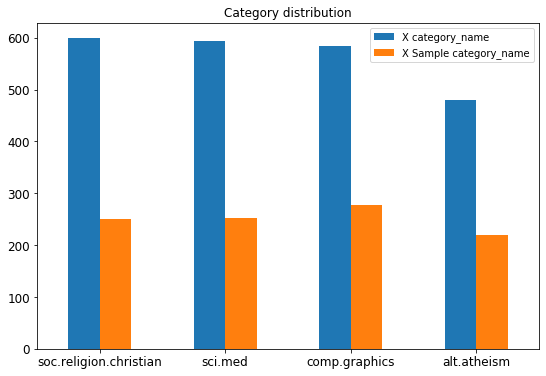

In [21]:
# Answer here
pd.concat({
    'X category_name': X.category_name.value_counts(), 'X Sample category_name': X_sample.category_name.value_counts()
}, axis=1, sort=False).plot(kind='bar', title='Category distribution', rot=0, fontsize=12, figsize= (9,6))

<div style='background: #7fffd4'> <h1> >>> Exercise 10 (take home): </h1>
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.  </div>

In [22]:
# importing libraries and creating countvectorizer/analyzer
import nltk
from sklearn.feature_extraction.text import CountVectorizer

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()

# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [23]:
# create term document matrix data frame
matrix = pd.DataFrame(X_counts.toarray(), 
                      columns=count_vect.get_feature_names())

matrix

# get data frame - columns words, rows documents. make one column called sum of presence of all terms of all documents then prioritize it based on that

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,zvi,zvonko,zwart,zyeh,zyklon,zyxel,zz,zzz,ªl,íålittin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# use apply function to check which values == 1 in fifth record, first 100 columns (since array example only selects 100 columns)
true_values = matrix.loc[4][0:100].apply(lambda x: x==1)

In [25]:
# filter out only true values
true_values[true_values]

00    True
01    True
Name: 4, dtype: bool

# Answer: The other 1 is the term '01'

<div style='background: #7fffd4'> <h1> >>> Exercise 11 (take home): </h1>
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histogram. As an exercise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization  </div>

# Answer:

Since there are so many terms and documents, it is quite labor intensive for the computer to load all the data. I decided to just take a random sample of the documents/terms and map those out in a visualization. We need a sample size of 328 documents and 380 terms to get 95% confidence level and 5% confidence interval (source: https://www.surveysystem.com/sscalc.htm).

For the first visualization, I decided to modify the original code slightly by using a clustermap instead of heatmap because 1) a clustermap allows for better comprehension of the data, as data is ordered by similarity via something called hierarchical clusters i.e. similar terms are reorganized so they are next to each other; and 2) it was able to load the sample data very quickly compared to the heatmap().

# Cluster Map
Based on the clustermap, you can see that the terms all cluster together mostly in the upper left. The lines on the outside are dendrograms (trees) that represent the hierarchical clusters - the greater the height difference in branches, the more dissimilar they are. For example, terms 'california' and 'psychic' are classified as dissimilar, while documents 424 and 883 are also not so similar - this is because they have a huge height difference between their dendrogram branches. The first few words on the left (california, artificial, monophysitisim, z5, denounced) seem to occur most frequently in the sample of documents.

However, even if the clustermap loaded more efficiently, after seeing this visualization, you can see that there is still room to generate deeper insights. I then utilized the scattertext library so I could better visualize term associations in the sample. I wanted to be able to see the distribution of the frequency of terms in the categories. Looking at our 4 categories, I realized that I can actually further generalize them into 2 categories: religion ('alt.atheism' and 'soc.religion.christian') and science ('comp.graphics' and 'sci.med'). I then generated a scattertext plot that plots word distribution of the 2 categories.

# Scattertext
Each point in the graph represents a term present in either a Religion or Science document. If the point is closer to the upper left of the graph, it was more commonly present in Religion documents. If its closer to the lower right, it was more commonly present in Science documents. Words in the lower left are infrequent for both categories, while words in the top right occur most frequently for both. You also see the "Top Religion" and "Top Science" words on the right - Religion tends to use more words like "god, jesus, christian, christians, faith." On the other hand, none of these words are mentioned in Science, which frequently contains more technical words like "graphics, program, image, files, windows." Words more associated with Religion are blue and Science red.

The "Characteristics" list shows you the list of words characteristic or unique to the entire corpus as a whole, which are used quite frequently in the corpus but not so much in everyday language. For example, the term "jfif" occurs quite frequently in the corpus as a whole, but you don't really find yourself using it so much in everyday conversation! The scattertext library does this by computing "the difference in dense term ranks between the words in all of the documents in the study and a general English-language frequency list."

Hovering over a word shows you its frequency in Religion and Science Categories and its TF-IDF Score. For example, the word "god" gives you "131:0 per 25k words. score:00150." This means that the word shows up 131 times in the Religion category, 0 times in the science category, for every 25k words in the corpus. Score is the TF IDF score. You can click on a word for more details, such as where it has been used within the corpus (for more context).

You can also see a summary of document count and word count for each category at the bottom. To be able to use the search function, please use the external link that's generated instead of the graph that loads on the Jupyter notebook.

We can further improve this distribution by removing stop words such as "is" and "the" or performing stemming so that terms like "christian" and "christians" are considered the same term.

<b> Please install the scattertext (`pip install scattertext`) and spacy(en) (`python -m spacy download en`) libraries so it can work and load properly. </b>

Library Documentation:
https://github.com/JasonKessler/scattertext#installation


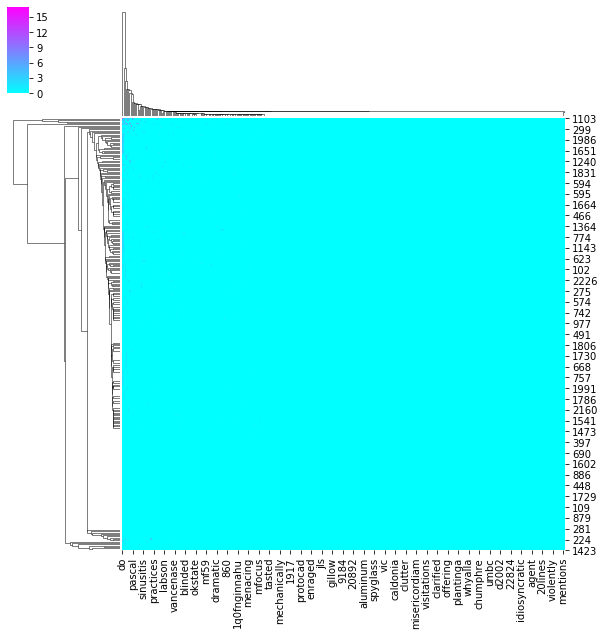

In [26]:
# code below
import seaborn as sns

# we need a sample size of 328 documents and 380 terms to get 95% confidence level and 5% confidence interval.
# source: https://www.surveysystem.com/sscalc.htm
heatmap_sample = matrix.sample(n=328).sample(n=380, axis=1) 


sns.clustermap(heatmap_sample, cmap="cool")

# see answer above for explanation of visualization

In [27]:
# for a better visualization, i wanted to map a scatter plot of the terms across the categories.

# generalizing 4 categories into 2 categories
general_category = []
for cat in X['category_name']:
    if cat == 'sci.med' or cat == 'comp.graphics':
        general_category.append("Science")
    else:
        general_category.append("Religion")
        
X['general_category'] = general_category

In [28]:
# import necessary libraries
import scattertext as st
import spacy
from pprint import pprint
from IPython.core.display import display, HTML
from IPython.display import IFrame


# note: for the second visualization we use the sample size n = 328 documents
# but we visualize all terms used in that document
heatmap_sample2 = X.sample(n=328)

# Turn it into a Scattertext Corpus 
# takes a few minutes
nlp = spacy.load('en')
corpus = st.CorpusFromPandas(heatmap_sample2, 
                            category_col='general_category', 
                              text_col='text',
                              nlp=nlp).build()

# create visualization
html = st.produce_scattertext_explorer(corpus,
          category='Religion', category_name='Religion', not_category_name='Science', term_scorer = st.CredTFIDF(corpus))

open("Visualization-copy-copy.html", 'wb').write(html.encode('utf-8'))
IFrame(src='Visualization.html', width = 1000, height=700)
# note: I created a copy of the HTML file because for some reason search stops working when loaded into the iframe below.
# However, they are all the same file.

# see answer above for explanation of visualization

<a href="Visualization-copy.html"> To use search, click here (let it load for a few minutes) </a>

In [29]:
# # you can also uncomment the lines below to load a heatmap of the sample
# # however this is quite slow and takes around ~10 minutes to generate

# plt.subplots(figsize=(9, 7))
# ax = sns.heatmap(heatmap_sample, cmap="PuRd",
#                  vmin=0, vmax=1, annot=True)

# # uncomment below to load the scattertext plot of the entire document
# # takes ~20 minutes to generate; also, browser might hang for a bit

# # Turn it into a Scattertext Corpus 
# corpus2 = st.CorpusFromPandas(X, 
#                             category_col='general_category', 
#                               text_col='text',
#                               nlp=nlp).build()

# html2 = st.produce_scattertext_explorer(corpus2,
#           category='Religion', category_name='Religion', not_category_name='Science', term_scorer = st.CredTFIDF(corpus2))

# open("Visualization-ALL.html", 'wb').write(html2.encode('utf-8'))
# IFrame(src='Visualization-ALL.html', width = 1000, height=700)

<div style='background: #7fffd4'> <h1> >>> Exercise 12 (take home): </h1>
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation. </div>

<IPython.core.display.Javascript object>


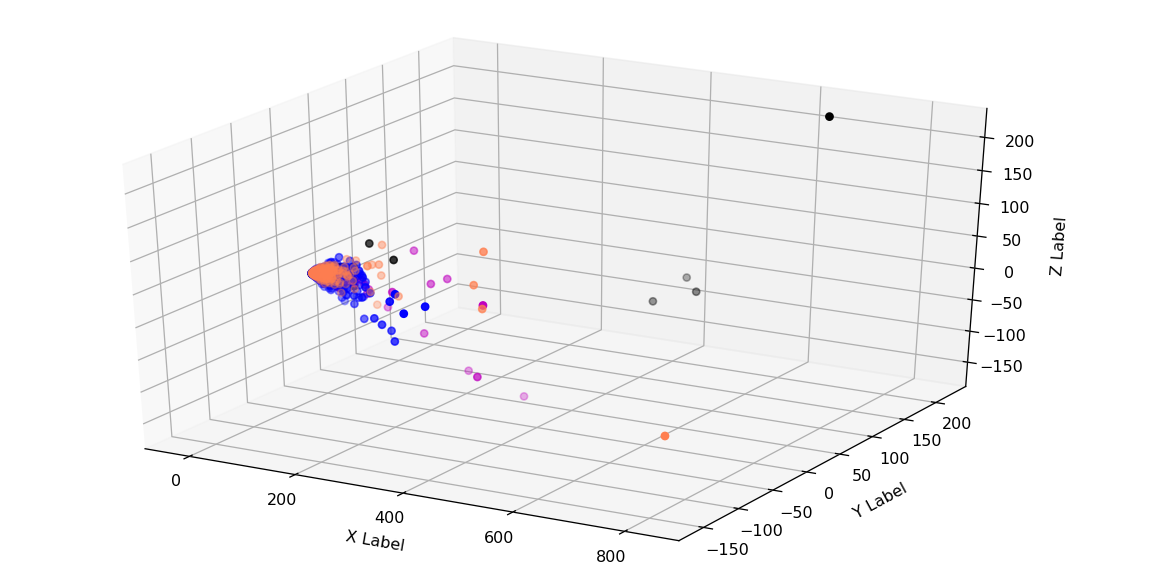

In [30]:
# Answer here:
%matplotlib notebook
%matplotlib notebook
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


# plot
fig = plt.figure(figsize = (10,5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=-60)

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']


for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2] #added 3rd dimension
    ax.scatter(xs, ys, zs, c = c, marker='o')
   

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

To view from different angles, we can interactively rotate the figure above or edit the "azim" param in Axes3D in the code above then rerun the cell. Along the 3 axes we see that the data is a bit more separated (hinting most variance is captured along X and Y axis / first 2 principal components). However the purple, black, blue, and orange points are still mostly clumped together along the area around (x= -170, y=150, z=-105) making it hard to separate the data.

<div style='background: #7fffd4'> <h1> >>> Exercise 13 (take home): </h1>
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. </div>

In [31]:
# compute term frequencies
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

<IPython.core.display.Javascript object>


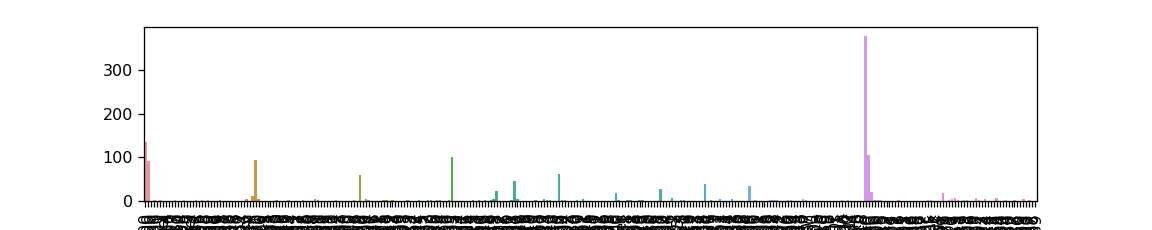

In [37]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# load original graph
plt.subplots(figsize=(10, 2))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [174]:
# load interactive graph with plotly
from plotly.offline import plot, iplot
import plotly.graph_objs as go

data = [go.Bar(
    x=count_vect.get_feature_names()[:300],
    y=term_frequencies[:300]
)]

layout = go.Layout(xaxis=dict(type='category'), title="Term Frequencies")
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# hover over a data point or use the buttons on the menu on the upper right to interact with the graph!

<div style='background: #7fffd4'> <h1> >>> Exercise 14 (take home): </h1>
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 
</div>

To reduce the number of terms, we will first clean the data then take a random sample of that cleaned data. After cleaning the data so it's roughly 83% of its original size, we decide on a sample size of n=150 to get 95% confidence level at 8% confidence interval (source: https://www.surveysystem.com/sscalc.htm)

In [324]:
# build dataframe of term frequencies
termfreq = pd.DataFrame( {'term':count_vect.get_feature_names(), 'freq': term_frequencies })
termfreq.shape

(35788, 2)

In [353]:
# cleaning the data

# remove numbers: for the purpose of this example, we will assume that numbers are not relevant for the analysis
termfreq = termfreq.mask(termfreq["term"].str.isnumeric()).dropna().reset_index(drop=True)

# remove _ at the beginning and end of terms, or words that are just ___ they are not relevant to the analysis

# takes one minute
for index, word in enumerate(termfreq['term']):
    termfreq['term'][index] = word.strip('_')

termfreq = termfreq[termfreq['term'] != '']


# lemmatize
nltk.download('wordnet')

lemmatizer=WordNetLemmatizer()
termfreq['term'] = termfreq['term'].apply(lambda x: lemmatizer.lemmatize(x))

# remove stop words
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
termfreq = termfreq[~termfreq['term'].isin(stop_words)]


# after cleaning, aggregate common terms
termfreq = termfreq.groupby('term').aggregate({'freq': 'sum'})
termfreq.shape
# we were able to reduce it from ~36K terms to ~29.5K terms

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tonigarcia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tonigarcia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [382]:
# Graphing A Sample
termfreqsample = termfreq.sample(n=150)

tfsdata = [go.Bar(
    x=termfreqsample.index,
    y=termfreqsample['freq']
)]

tfslayout = go.Layout(xaxis=dict(type='category'), title="Term Frequencies")
tfsfig = go.Figure(data=tfsdata, layout=tfslayout)
iplot(tfsfig)

<div style='background: #7fffd4'> <h1> >>> Exercise 15 (take home): </h1>
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses).
</div>

In [385]:
# make sorted dataframe
tfs_sorted = termfreqsample.sort_values(by='freq', ascending=False)

tfs_sorteddata = [go.Bar(
    x=tfs_sorted.index,
    y=tfs_sorted['freq']
)]

tfs_sortedlayout = go.Layout(xaxis=dict(type='category'), title="Term Frequencies")
tfs_sortedfig = go.Figure(data=tfs_sorteddata, layout=tfs_sortedlayout)
iplot(tfs_sortedfig)

<div style='background: #7fffd4'> <h1> >>> Exercise 16 (take home): </h1>
Try to generate the binarization using the `category_name` column instead. Does it work?.
</div>

In [391]:
# Yes, it works too
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X['category_name'])
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[:13]

,text,category,category_name,unigrams,general_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...",Science,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....",Science,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...",Religion,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...",Religion,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...",Religion,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...",Religion,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...",Religion,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...",Science,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...",Science,"[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[From, :, libman, @, hsc.usc.edu, (, Marlena, ...",Science,"[0, 0, 1, 0]"
